In [1]:
from sklearn.datasets import fetch_openml

# Download MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract features and labels
X, y = mnist.data, mnist.target

# Print the shape of features and labels
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)


Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)


In [3]:
# Convert categorical labels to integer labels
y_train_int = y_train.cat.codes
y_test_int = y_test.cat.codes

# Build the MLP model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_int, epochs=10, validation_data=(X_test_scaled, y_test_int))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_int)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test_scaled)


/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8679 - loss: 0.4499 - val_accuracy: 0.9595 - val_loss: 0.1357
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1060 - val_accuracy: 0.9711 - val_loss: 0.0970
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0648 - val_accuracy: 0.9694 - val_loss: 0.1002
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9736 - val_loss: 0.0896
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.9729 - val_loss: 0.0950
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.9735 - val_loss: 0.1007
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0258 - val_accuracy: 0.9749 - val_loss: 0.1035
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0187 - 

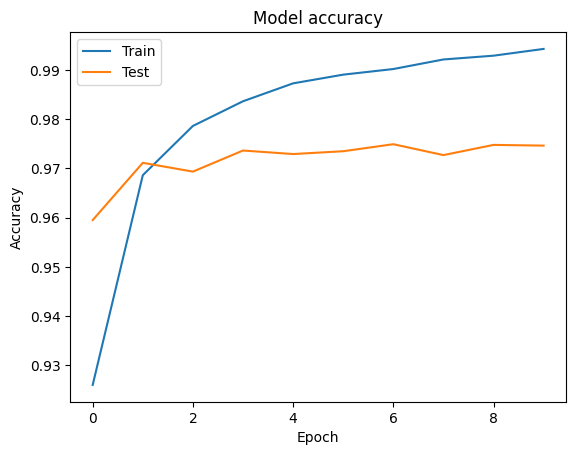

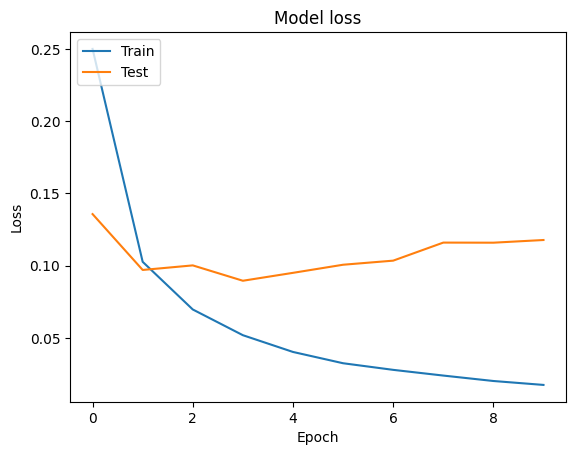

In [4]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Call the function to plot training history
plot_history(history)


In [5]:
'''
    Architecture of the Multilayer Perceptron (MLP):
        Input Layer: The input layer consists of nodes representing each feature in the input data. Since each image has been flattened into a feature vector of length 784 (28x28 pixels), the input layer will have 784 nodes.
        Hidden Layers: The MLP may consist of one or more hidden layers. Each hidden layer contains a certain number of neurons, and the number of hidden layers and neurons per layer can be adjusted based on the complexity of the task and computational resources available.
        Activation Functions: Activation functions are applied to the output of each neuron in the hidden layers to introduce non-linearity into the model and enable the network to learn complex patterns in the data. Common activation functions include ReLU (Rectified Linear Unit), Sigmoid, and Tanh.
        Output Layer: The output layer consists of nodes corresponding to the number of classes in the classification task. Since the dataset contains images of handwritten digits (0-9), there will be 10 output nodes, each representing the probability of the input image belonging to a particular digit class.
        Prediction: During prediction, the MLP takes an input image (flattened feature vector) and passes it through the network. The input is multiplied by the weights and passed through the activation functions in each layer to generate predictions at the output layer. The class with the highest probability is considered as the predicted class for the input image.

    Explanation of Components:
        Number of Input Nodes: 784 nodes, corresponding to the length of the flattened feature vector representing each image.
        Hidden Layers: The number of hidden layers and units per layer can vary depending on the complexity of the problem and computational constraints.
        Hidden Units per Layer: The number of hidden units (neurons) per layer is a hyperparameter that can be tuned during model training. A higher number of hidden units can capture more complex patterns in the data but may also lead to overfitting.
        Activation Functions Used: Common activation functions include ReLU (Rectified Linear Unit) for hidden layers and Softmax for the output layer in multi-class classification tasks.
        Output Nodes: 10 nodes, corresponding to the 10 classes (digits 0-9) in the classification task.
        Prediction: The MLP makes predictions by passing the input image through the network, applying linear transformations (weighted sums) and activation functions in each layer, and finally producing probabilities for each class at the output layer. The class with the highest probability is chosen as the predicted class for the input image.


'''

'\n    Architecture of the Multilayer Perceptron (MLP):\n        Input Layer: The input layer consists of nodes representing each feature in the input data. Since each image has been flattened into a feature vector of length 784 (28x28 pixels), the input layer will have 784 nodes.\n        Hidden Layers: The MLP may consist of one or more hidden layers. Each hidden layer contains a certain number of neurons, and the number of hidden layers and neurons per layer can be adjusted based on the complexity of the task and computational resources available.\n        Activation Functions: Activation functions are applied to the output of each neuron in the hidden layers to introduce non-linearity into the model and enable the network to learn complex patterns in the data. Common activation functions include ReLU (Rectified Linear Unit), Sigmoid, and Tanh.\n        Output Layer: The output layer consists of nodes corresponding to the number of classes in the classification task. Since the datas